# 第二题：决策树处理回归任务

实验内容
1.	使用sklearn.tree.DecisionTreeRegressor完成kaggle房价预测问题
2.	计算最大深度为10的决策树，训练集上十折交叉验证的MAE和RMSE
3.	绘制最大深度从1到30，决策树在训练集和测试集上MAE的变化曲线
4.  选择一个合理的树的最大深度，并给出理由

## 1. 读取数据

In [21]:
import pandas as pd
data = pd.read_csv('data/kaggle_house_price_prediction/kaggle_hourse_price_train.csv')

In [22]:
# 丢弃有缺失值的特征（列）
data.dropna(axis = 1, inplace = True)

# 只保留整数的特征
data = data[[col for col in data.dtypes.index if data.dtypes[col] == 'int64']]

In [23]:
data.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


## 2. 数据集划分

70%做训练集，30%做测试集

In [24]:
from sklearn.utils import shuffle

In [25]:
data_shuffled = shuffle(data, random_state = 32)
split_line = int(len(data_shuffled) * 0.7)
training_data = data_shuffled[:split_line]
testing_data = data_shuffled[split_line:]

## 3. 导入模型

In [26]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [27]:
from sklearn.tree import DecisionTreeRegressor

## 4. 选取特征和标记

In [28]:
features = data.columns.tolist()
target = 'SalePrice'
features.remove(target)
training_data_x = training_data[features]
training_data_y = training_data[target]
print(training_data_x.shape)
print(training_data_y.shape)

(1021, 34)
(1021,)


## 5. 训练与预测

请你在下面计算树的最大深度为10时，使用训练集全量特征训练的决策树的十折交叉验证的MAE和RMSE  

In [29]:
# YOUR CODE HERE
model = DecisionTreeRegressor(max_depth=10,random_state=0)
prediction = cross_val_predict(model,training_data_x,training_data_y,cv = 10)
print(mean_absolute_error(training_data_y,prediction))
print(mean_squared_error(training_data_y,prediction)**0.5)

27076.94027456889
43549.83978276051


###### 双击此处编辑
最大深度为10，全量特征的决策树，十折交叉验证指标

MAE|RMSE
-|-
26787.89832186358|43765.45026211308

## 6. 改变最大深度，绘制决策树的精度变换图

绘制最大深度从1到30，决策树训练集和测试集MAE的变化图

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


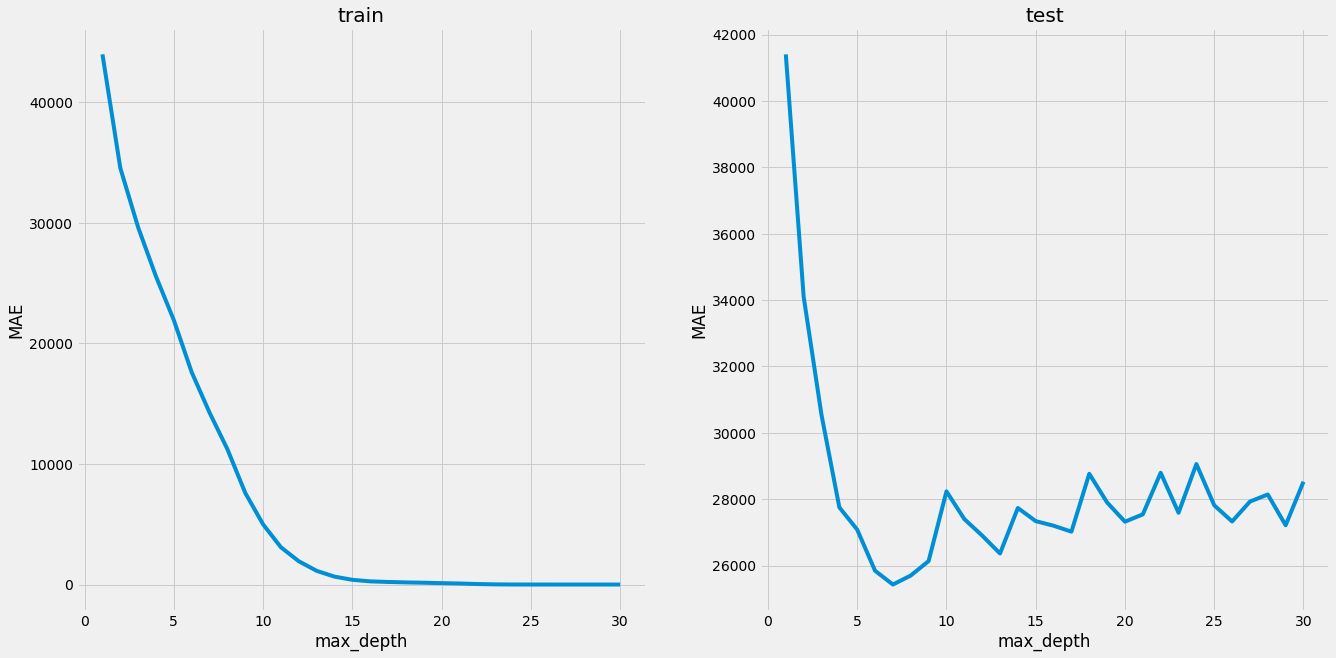

In [31]:
list_x = []
list_y1 = []
list_y2 = []
training_data_x = training_data[features]
training_data_y = training_data[target]

test_data_x = testing_data[features]
test_data_y = testing_data[target]

plt.figure(figsize = (20,10))
for i in range(1,31):
    print(i)
    
    model = DecisionTreeRegressor(max_depth=i)
    model.fit(training_data_x,training_data_y)
    prediction1 = model.predict(training_data_x)
    prediction2 = model.predict(test_data_x)
    MAE1 = mean_absolute_error(training_data_y,prediction1)
    MAE2 = mean_absolute_error(test_data_y,prediction2)
    list_x.append(i)
    list_y1.append(MAE1)
    list_y2.append(MAE2)
    
plt.subplot(1,2,1)
plt.plot(list_x,list_y1)
plt.title("train")
plt.xlabel("max_depth")
plt.ylabel("MAE")

plt.subplot(1,2,2)
plt.plot(list_x,list_y2)
plt.title("test")
plt.xlabel("max_depth")
plt.ylabel("MAE")
plt.show()

In [36]:
list_y2.index(min(list_y2))

6

请你选择一个合理的树的最大深度，并给出理由
###### 双击此处编辑
> 综合评价MAE折线图来看，在max_Depth = 6时MAE达到最小值，所以我认为在范围[1,30]中合理的最大深度为6，且若max_Depth若太高会造成过拟合，太少会造成欠拟合